# Heating Load Analysis

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

## About the data

The following dataset comes from a study about the heating load required to maintain comfortable indoor air conditions at buildings. That study investigated the effect of eight input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution) on the required heating load.

This study simulated a total of 768 buildings. Those buildings had different surface areas and dimensions, but the same volume and construction materials.

The goal of this assignment is to use machine learning techniques for the prediction of the required heating load. Since the output variable of this dataset (required heating load) is a continuous variable, we will treat this problem as 

## About the assignment

A typical supervised learning task involves creating training and testing sets, performing hyperparameter tuning on the selected algorithm and validating its performance. 

A preliminary study was applied to handle this problem. The selected algorithm was *K-Nearest Neighbours* (KNN). The performance of the method was validated on the testing data by capturing two different metrics: *Mean Absolute Error* (MAE) and *Mean Square Error* (MSE). The findings of this study were:

**MAE = 1.875**\
**MSE = 8.495**

Let’s see if we can do better than that! For this assignment, we will go through the data first and check if we can apply feature engineering. Feature engineering is an important step as it can be used to create or remove features, reduce data complexity and generally understand the data better in order to improve performance. 

We will go through the steps of applying feature engineering, splitting the data into training/testing sets and using *k-fold* cross-validation to tune the parameters of KNN. The performance of the model will be validated using the **MAE** and **MSE** metrics.

## Setup

First, let's load all the necessary libraries needed for this assignment.

We will import `numpy` and `pandas` for all the data manipulation tasks. `matplotlib` and `seaborn` will be used to generate plots and graphs that will assist us during feature engineering. `scipy stats` is useful since it contains a large number of statistical functions.

Finally, `sklearn` will be used for training the regression model. For this assignment we will need modules about data preprocessing (`MinMaxScaler, OneHotEncoder`), cross-validation (`train_test_split`,`GridSearchCV`,`KFold`), metrics (`mean_absolute_error`,`mean_squared_error`) and the *KNN* regression (`KNeighborsRegressor`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats 

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_58090/4171191284.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data

In this assignment we will load two datasets. The first one contains the data needed for training our model (let's save it to a variable called `df`). The second one contains the data needed for evaluating our model with **KATE**. This will be our held-out test data (let's save it to a variable called `df_eval`).

We will need to process `df_eval` in exactly the same way as `df`, train our model on `df` and make predictions using `df_eval`.

Run the following cell to load the data.

In [2]:
df = pd.read_csv('data/heating_load.csv')
df_eval = pd.read_csv('data/heating_load_eval.csv')

print(df.shape)
print(df_eval.shape)

(614, 9)
(154, 9)


In [3]:
df_eval.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
0,0.71,710.5,269.5,220.5,3.5,3,0.1,3,NaN
1,0.82,612.5,318.5,147.0,7.0,3,0.1,5,NaN
2,0.82,612.5,318.5,147.0,7.0,5,0.1,4,NaN
3,0.79,637.0,343.0,147.0,7.0,3,0.4,5,NaN
4,0.62,808.5,367.5,220.5,3.5,5,0.1,3,NaN


Notice that while both `df` and `df_eval` have $9$ columns, the `heating_load` column in `df_eval` is full on null values.

This is because `heating_load` is our target variable and `df_eval` is our test set. In this assignment, we will use the input features from `df_eval` to predict the `heating_load`, and **KATE** will evaluate these predictions against the actual values. This is what's known as a held-out test set.

**Prepare input and output**

Prepare the input and output variables for this assignment. Store the resulting DataFrames to the following variables:

* `X_train`: the input features of `df`
* `y_train`: the output variable of `df`
* `X_eval` : the input features of `df_eval`

*Hint: for `X_eval` just drop the column which contains nothing but null values*

In [4]:
# Add your code here
X_train = df.drop('heating_load', axis=1)
y_train = df[['heating_load']]
X_eval = df_eval.drop('heating_load', axis=1)


In [5]:
y_train

,heating_load
0,15.16
1,32.12
2,11.69
3,10.14
4,19.06
...,...
609,32.24
610,29.87
611,25.38
612,10.75


## Feature engineering

**1. Analysis for feature engineering**

In this part, we will investigate how we can manipulate the dataset in order to create/remove/manipulate features and extract useful information from the data. Your task for this part of the assignment is to do just that! 

Manipulate the data and come up with a new representation with the goal of improving performance. You can follow the hints that have been provided in this notebook as a guide.

It is important to note that following all of the hints **does not** guarantee improved model performance. The hints are some standard methodologies that can be used for feature engineering. 

**It is up to you to implement the analysis you want in order to manipulate the datasets and improve the results at the end.**

At the end of your analysis, replace the original DataFrames `X_train` and `X_eval`. Please ensure that these variables both are `pd.DataFrame()` Make sure you keep the same variable names, as it is important for the next steps of this assignment.

Put all your processing within a function (e.g. `feature_engineering()`) instead of plain Python code.

#### Hint No. 1 

It is always useful to look at some basic information about the data we are dealing with. Since we are using `pandas`, we can apply the existing methods of the DataFrame `X_train` to check basic information about our dataset. Use the `.info()` and `.describe()` methods.

In [6]:
X_train.info()
# all columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       614 non-null    float64
 1   surface_area               614 non-null    float64
 2   wall_area                  614 non-null    float64
 3   roof_area                  614 non-null    float64
 4   overall_height             614 non-null    float64
 5   orientation                614 non-null    int64  
 6   glazing_area               614 non-null    float64
 7   glazing_area_distribution  614 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 38.5 KB


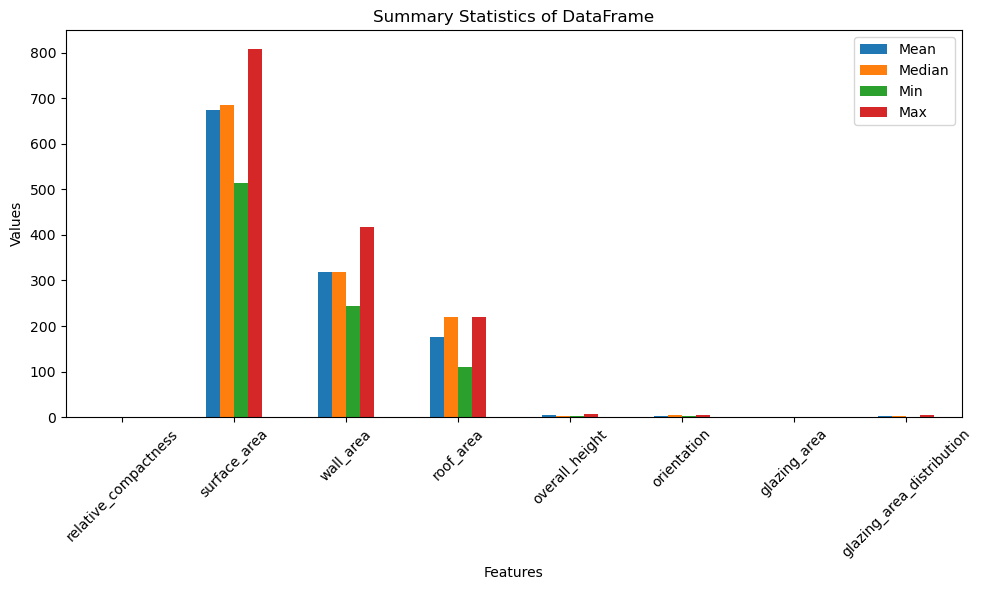

In [7]:
desc = X_train.describe()

desc = desc.transpose()

# Plotting
desc[['mean', '50%', 'min', 'max']].plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics of DataFrame')
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(['Mean', 'Median', 'Min', 'Max'])
plt.tight_layout()
# plt.ylim([0,10])
plt.show()

# need to normalise the columns

In [8]:
X_train.orientation.unique()

array([2, 3, 5, 4])

#### Hint No. 2 

It is helpful to create histograms of the examined variables. You can use `matplotlib` and `seaborn` to create those histograms and look at the distribution of the data. Depending on the distribution, we can apply various transformations.

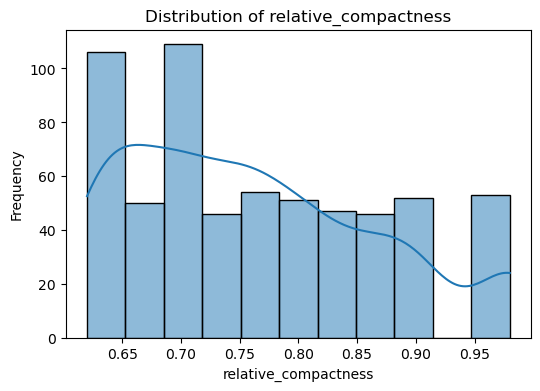

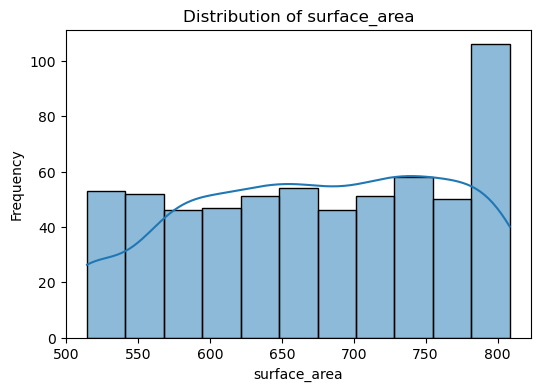

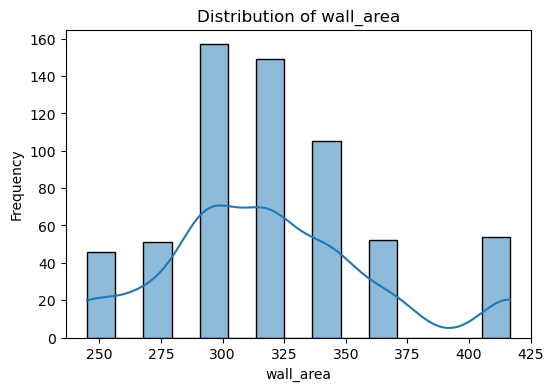

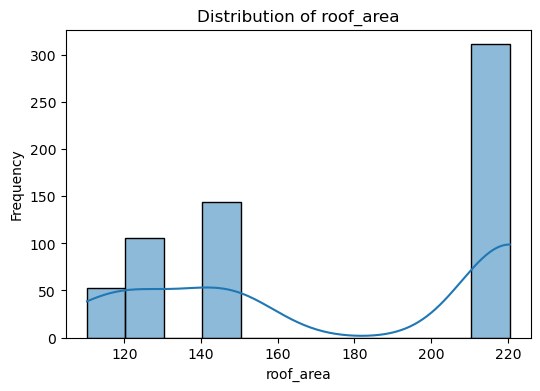

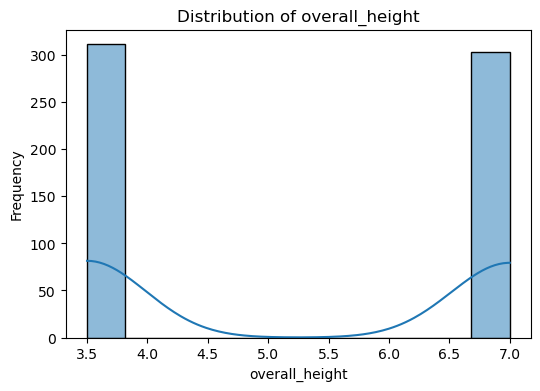

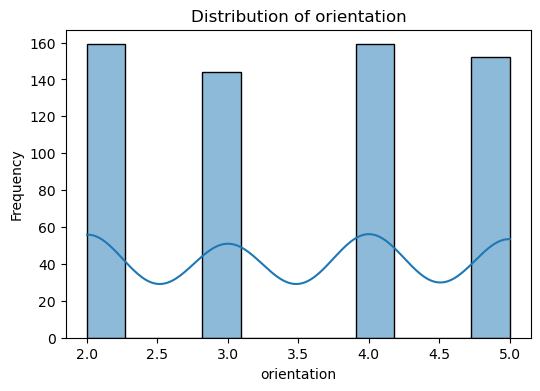

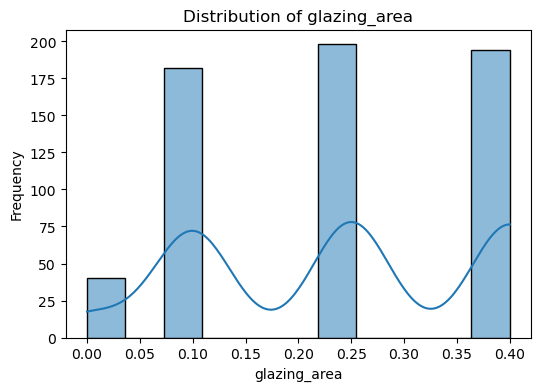

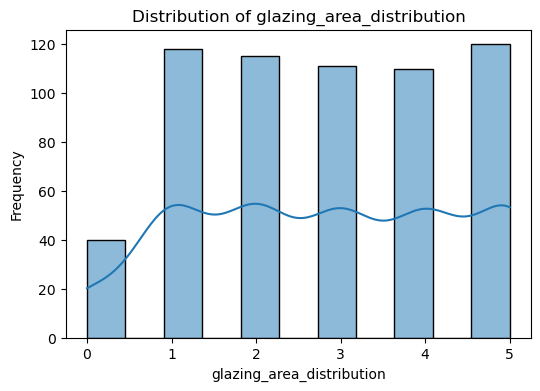

In [9]:
for column in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# KDE stands for Kernel Density Estimate. 
# It's a non-parametric way to estimate the probability density function (PDF) of a random variable. 
# This method is used for the analysis of continuous data, and it's particularly useful for visualizing the underlying distribution of the data when you don't want to make any assumptions about its form (i.e., it's non-parametric).

# relative_compactness and surface area: uniform
# wall_area: gaussian
# roof_area: two extremes and low extreme has more variation in distribution
# everything else: very categorical

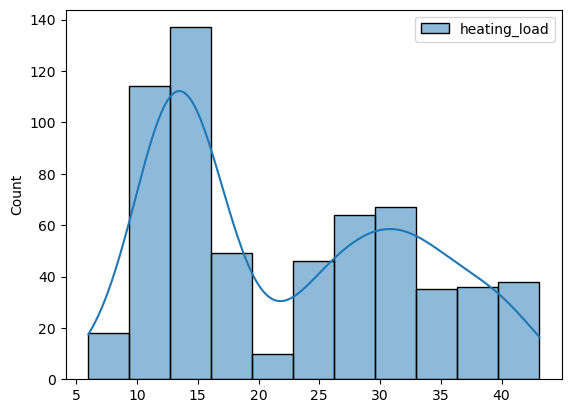

In [10]:
sns.histplot(y_train, kde=True)
plt.show()

# y_train is countinuous

#### Hint No .3 

Looking at the correlation values between the features, is a good way of determining which variables could be omitted. You can calculate and visualise the correlation matrix and decide which variables (if any) could be removed/replaced. 

The correlation matrix can be easily computed using the `.corr()` method of the `X_train` DataFrame.

Visualising the matrix can be achieved with the `seaborn` library.

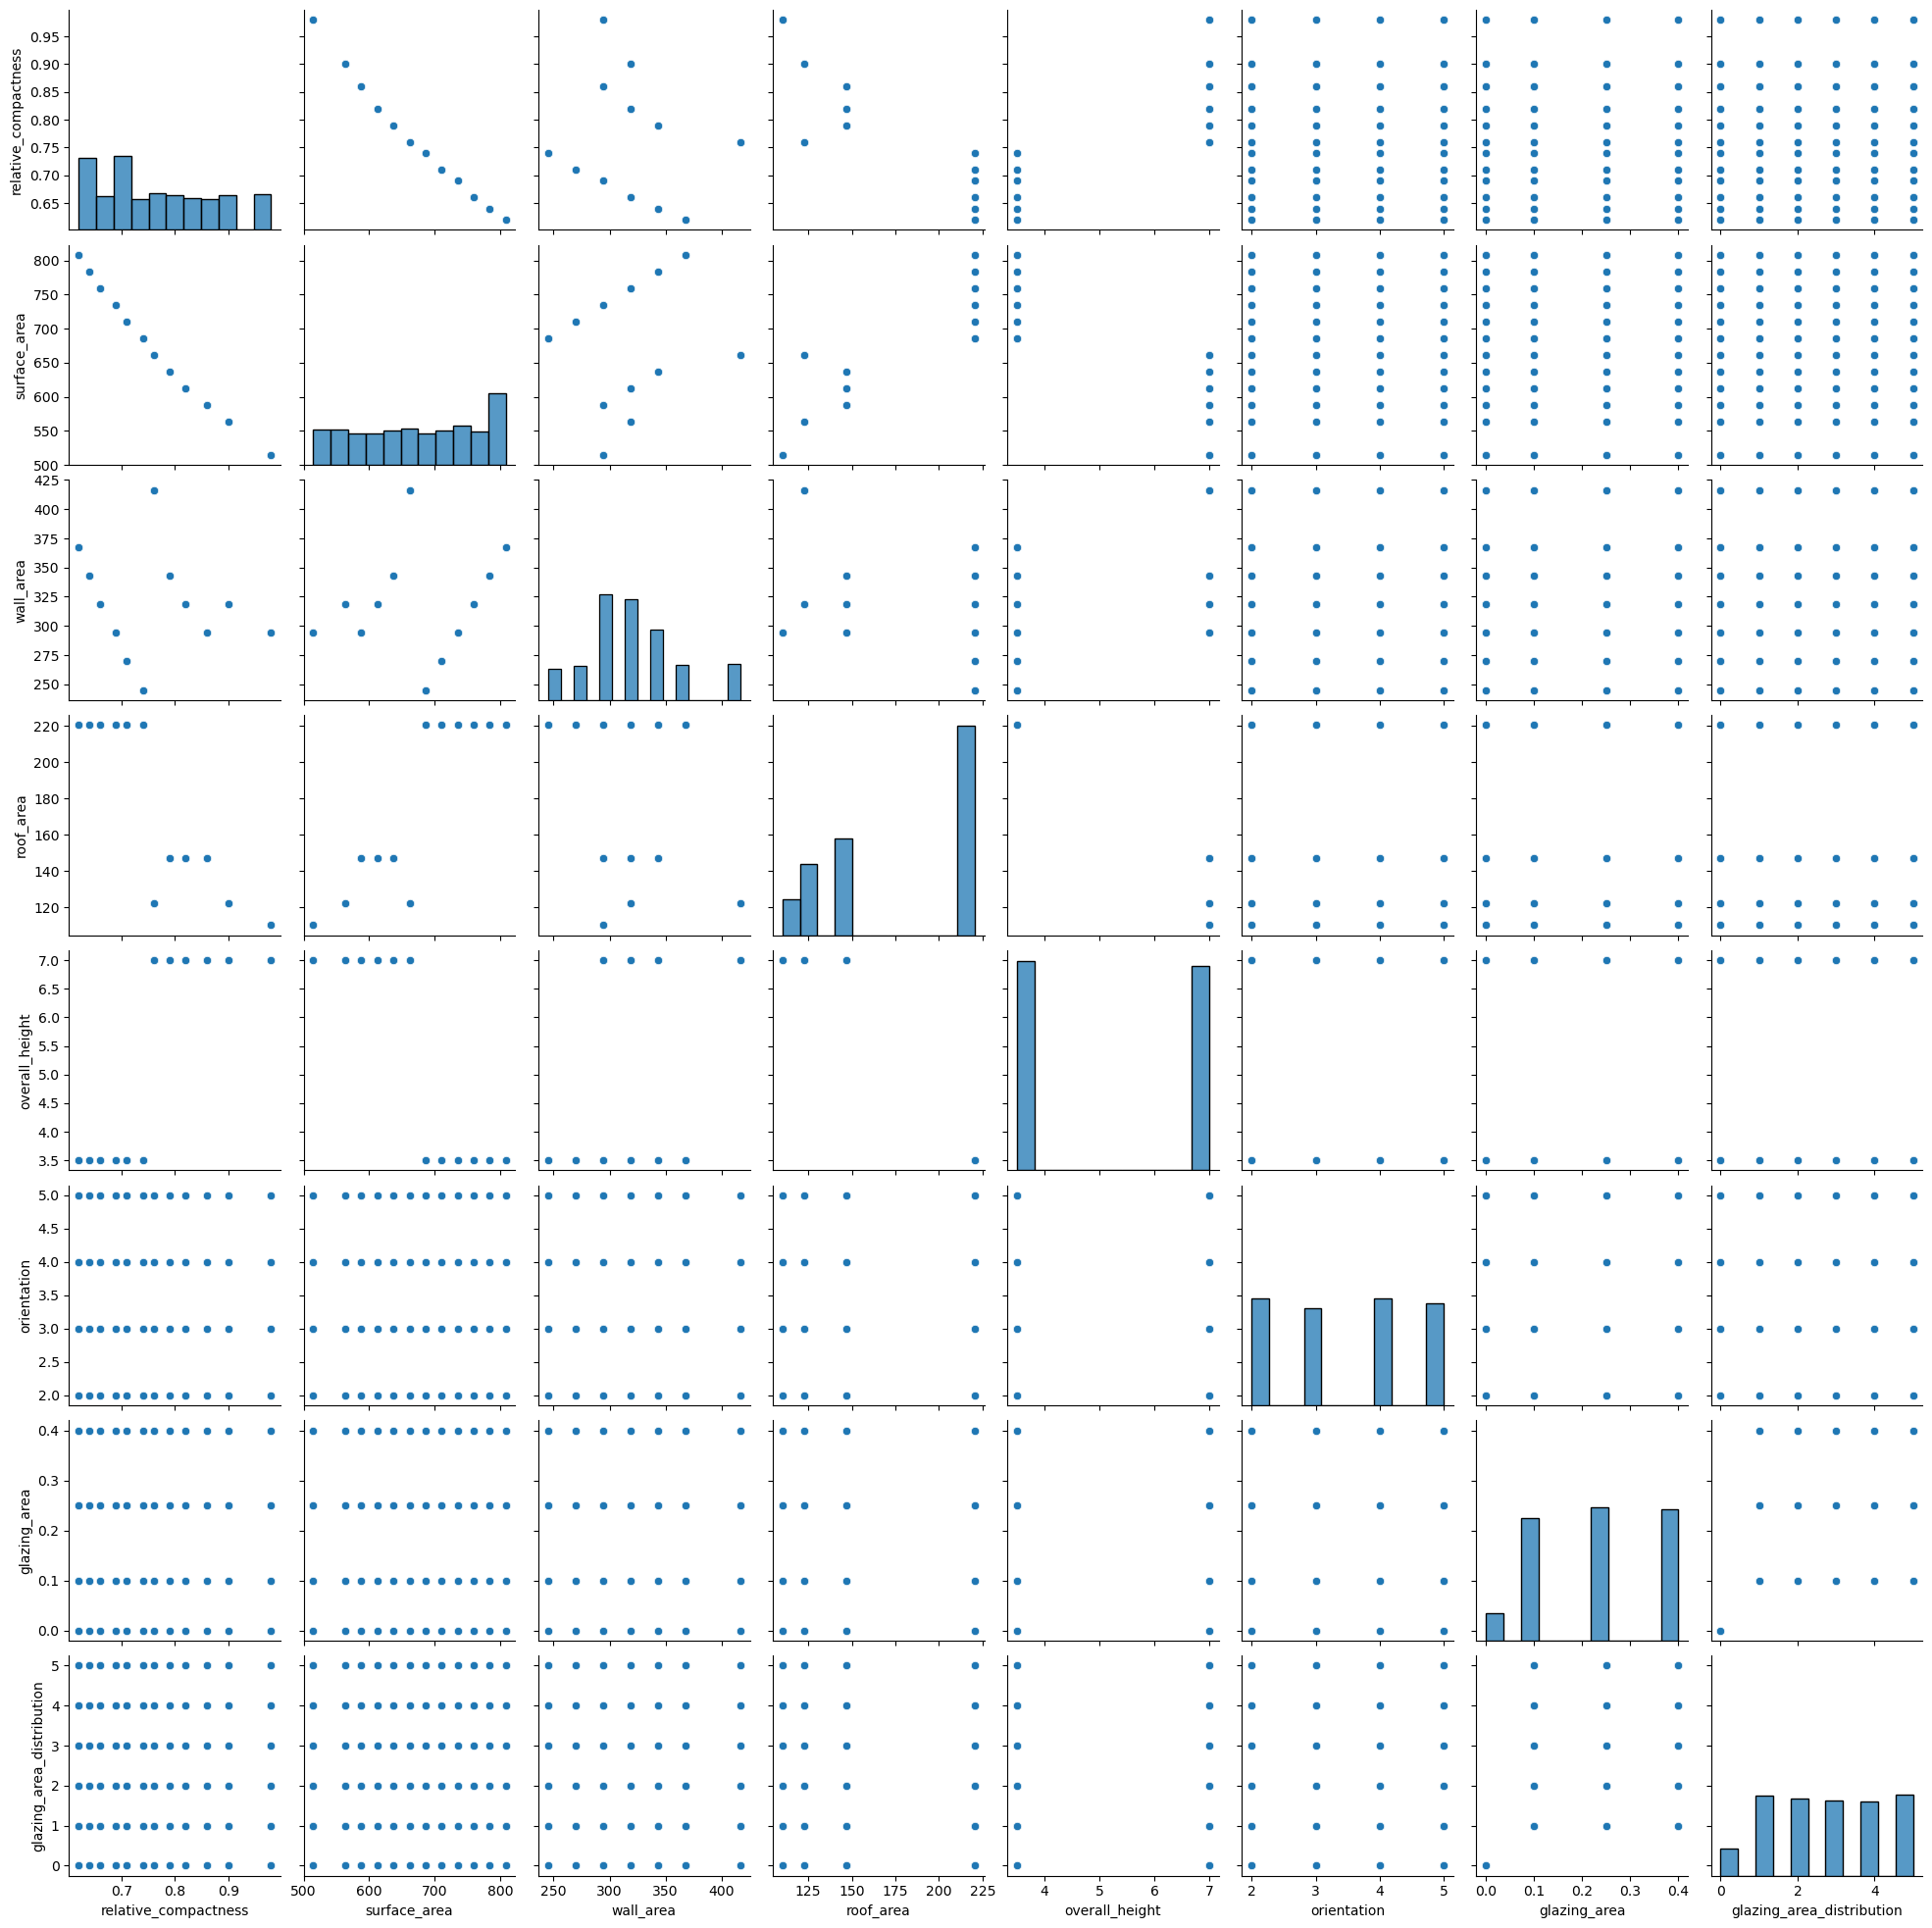

In [11]:
sns.pairplot(X_train)
plt.show()

In [12]:
# sns.pairplot(X_train, kind='kde')
# plt.show()


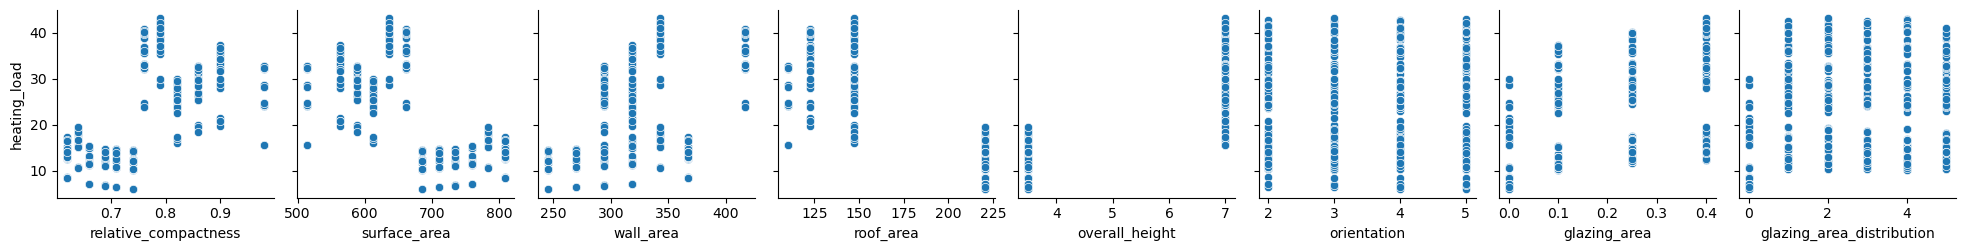

In [13]:
sns.pairplot(df, x_vars=X_train.columns, y_vars='heating_load')
plt.show()

# this shows that the data has been pre-processed before and the categorical data are easy to identify with the vertical bins

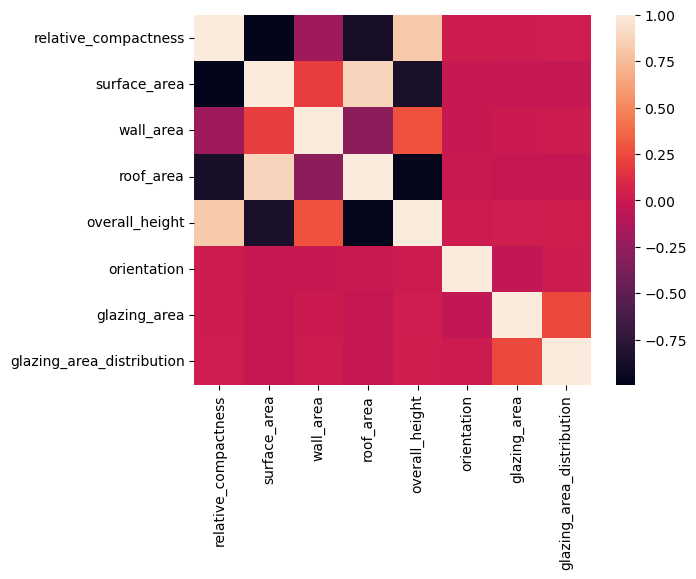

In [14]:
sns.heatmap(X_train.corr())
plt.show()

# this is essentially the same as the information shown on pairplot(X_train)
# high correction between the first five variables:
# 1) relative_compactness vs surface_area
# 2) relative_compactness vs roof_area

# weak correlation between (variables to keep)
# relative compactness vs wall_area

#### Hint No. 4 

It is important to look at the data and discover outliers (if any). Outliers can cause a model to underperform since they differ from the majority of the data. 

Visualising the data is a good method to detect outliers. However, there are some statistical methodologies that perform well and are quick to compute. Using standard deviation and the *z-score* is one such method.

The *z-score* tells us how many standard deviations away a value is from the mean. If a sample is a certain number of standard deviations away from the mean (e.g. 2-4), then it can be assumed to be an outlier.

Experiment with the data and determine whether some values could be treated as outliers.

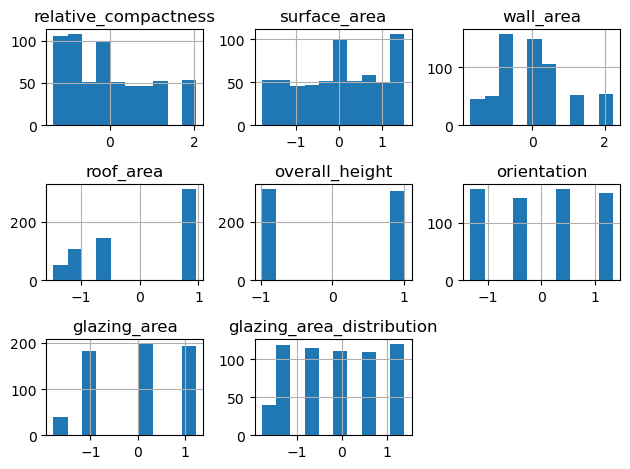

In [15]:
# evaluate the outliers using z-score
X_train.apply(stats.zscore, axis=0).hist()
plt.tight_layout()
plt.show()

# z-score all between -2 and 2
# no outliers worth considering here

#### Hint No. 5 

Some features in the dataset do not have continuous values. Instead they have integer values. In many cases, when a feature has only integer values, then it is possible that those values do not have a numerical meaning. 

Consider an example where there is a feature that describes the seasons ('autumn','winter','spring','summer') by using numbers 1,2,3,4. Even though 2>1 from a numerical standpoint, it makes no sense to say that 'winter'>'autumn'. This trick is useful when we do not want to work with categorical values.

To handle situations similar to that one, we can use One-Hot-Encoding. This is a trick where we create new binary variables for our dataset. Each new variable represents one of the original options. 

Use the `sklearn` library to perform One-Hot-Encoding for the variable called `orientation`. Use `OneHotEncoder` from `sklearn` and set the parameter `handle_unknown='ignore'`. 

In [16]:
# the categorical variables
# orientation, 


In [17]:
df.orientation.unique()

array([2, 3, 5, 4])

In [18]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
# sparse default is True to save memories of storing all the repeating 0S
processed_orientation = pd.DataFrame(enc.fit_transform(X_train[['orientation']]))
processed_orientation

/Users/hlz/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,1.0,0.0
610,0.0,1.0,0.0,0.0
611,0.0,0.0,1.0,0.0
612,0.0,0.0,0.0,1.0


In [19]:
new_column_names = enc.get_feature_names_out(input_features=['orientation'])
processed_orientation.columns = new_column_names
processed_orientation

,orientation_2,orientation_3,orientation_4,orientation_5
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,1.0,0.0
610,0.0,1.0,0.0,0.0
611,0.0,0.0,1.0,0.0
612,0.0,0.0,0.0,1.0


In [20]:
# or alternatively just use dummies
prcessed_orientation = pd.get_dummies(X_train['orientation'])
prcessed_orientation

,2,3,4,5
0,True,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
609,False,False,True,False
610,False,True,False,False
611,False,False,True,False
612,False,False,False,True


#### Hint No. 6

It is standard procedure to perform feature scaling before training a model. This way, we can bring all the features to the same range and avoid having some features being more dominant than others.

You can use the `MinMaxScaler` utility to set the data to pre-defined range between a minimum and a maximum number. This range is usually set to [0,1].

In [21]:
# Add your code here
def feature_engineering(data):

    # drop unnecessary columns based on the correlation between variables
    data.drop(['surface_area', 'overall_height', 'glazing_area_distribution'], axis=1, inplace=True)

    # transform categorical column: orientation
    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    processed_orientation = pd.DataFrame(enc.fit_transform(data[['orientation']]))
    new_column_names = enc.get_feature_names_out(input_features=['orientation'])
    processed_orientation.columns = new_column_names
    data.drop(['orientation'], axis=1, inplace=True)

    # scale the numerical columns
    scaler = MinMaxScaler(feature_range=(0,1))
    processed_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

    # join the categorical columns
    processed_df = processed_df.join(processed_orientation)

    return processed_df

X_train = pd.DataFrame(feature_engineering(X_train))
X_eval = pd.DataFrame(feature_engineering(X_eval))


/Users/hlz/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hlz/miniconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   relative_compactness  614 non-null    float64
 1   wall_area             614 non-null    float64
 2   roof_area             614 non-null    float64
 3   glazing_area          614 non-null    float64
 4   orientation_2         614 non-null    float64
 5   orientation_3         614 non-null    float64
 6   orientation_4         614 non-null    float64
 7   orientation_5         614 non-null    float64
dtypes: float64(8)
memory usage: 38.5 KB


## Cross-validation

The next step is to use cross-validation to tune the hyperparameters of our regressor(s). Each method (e.g Decision Trees, SVM, Logistic Regression etc) has its own set of hyperparameters that require tuning. Fine tuning is essential in order to address possible under- or over-fitting issues. For this assignment, we will use the `KNeighborsRegressor` from `sklearn`.

**2. K-Fold validation**

We will use k-fold validation on the training test in order to pick the best set of parameters.
Use the `KFold` utility to define a k-fold object. Use a 5-fold validation approach. Save it to a variable called `cv_object`. For reproducability purposes, set `shuffle=True` and `random_state=50`. 

In [23]:
# Add your code here
cv_object = KFold(n_splits=5, shuffle=True, random_state=50)


**3. Hyperparameter tuning**

Define the values of the grid that is to be explored. To do this, create a variable called `grid_values`. This should be a dictionary where the keys are the names of the hyperparameters of the `KNeighborsRegressor` and the values are lists that contain the desired hyperparameter values.

For this assignment, create a grid for the following hyperparameters:

`n_neighbors`, `weights`

In [24]:
# Add your code here
grid_values = {
    "n_neighbors": np.arange(2,10),
    "weights": ['uniform', 'distance']
}


Having defined the values of the grid, it is now time to use `GridSearchCV`.

Define a grid search estimator and assign it to a variable called `grid_estimator`. Use `KNeighborsRegressor` as a base estimator. 

There is no need to define any hyperparameters, since we have already done that in the previous step (`grid_values`).

Use the `cv_object` from the previous step, and `neg_mean_absolute_error` as a scoring metric.

In [25]:
# Add your code here
grid_estimator = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=grid_values,
    cv=cv_object,
    scoring='neg_mean_absolute_error'
)


## Training

**4. Training phase and identification of best hyperparameters**

Everything is in place. We can now train our model using the training set. Use the `.fit()` method of the estimator you defined in the previous step. The result will be the best estimator based on the hyperparameter values we defined.

In [26]:
# Add your code here
grid_estimator.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

Once training is complete, uncomment and run the cell below to view the best parameters

In [27]:
grid_estimator.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

Now that we have trained our model, let's see how well it performs on the training data.

Create a variable `y_pred` and store the predictions of the model for the training set:

In [28]:
# Add your code here
y_pred = grid_estimator.predict(X_train)


Calculate the performance of our model on the training set using the `mean_absolute_error` and `mean_squared_error` metrics. Assign the results to variables variable called `mae` and `mse` respectively. They should be float numbers, rounded to 3 digits (e.g 1.452)

In [29]:
# Add your code here
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)


Once complete, uncomment and run the cell below to print the metrics on testing.

In [30]:
print("Mean Absolute Error metric for KNN: {}".format(mae))
print("Mean Square Error metric for KNN: {}".format(mse))

Mean Absolute Error metric for KNN: 0.30673724212812165
Mean Square Error metric for KNN: 0.20479136807817605


## Validation

**5. Validation step on the testing set**

We can now use this model to make predictions on new, previously unseen data. It is now time to use the testing set and validate the performance of our classifier by submitting to **KATE**.

Create a variable `y_eval_pred` and store the predictions of the model for the evaluation set. 

In [31]:
# Add your code here
y_eval_pred = grid_estimator.predict(X_eval)


At this point, we have processed our features and trained a model. We have also generated predictions for data without labels (`y_eval_pred`). To see how well our model has performed on the test set, you will have to submit it to **KATE**!